<a href="https://colab.research.google.com/github/bbortey9/bbortey9/blob/main/NIW_Projects_With_SMOTE_Technique_Final_Dummy_for_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
import joblib
from sklearn import metrics
import statsmodels.api as sm
import re  # Import the 're' module for regular expressions
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the data
Data=pd.read_excel('C:/Users/Benjamin/Desktop/Interview/NIW/Data/Final_data_GSS/GSS.xlsx')

FileNotFoundError: ignored

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       72390 non-null  int64 
 1   id_        72390 non-null  int64 
 2   wrkstat    72390 non-null  object
 3   evwork     72390 non-null  object
 4   occ        72390 non-null  int64 
 5   prestige   72390 non-null  object
 6   wrkgovt    72390 non-null  object
 7   commute    72390 non-null  object
 8   industry   72390 non-null  object
 9   occ80      72390 non-null  object
 10  age        72390 non-null  object
 11  padeg      72390 non-null  object
 12  madeg      72390 non-null  object
 13  sex        72390 non-null  object
 14  race       72390 non-null  object
 15  res16      72390 non-null  object
 16  rincome    72390 non-null  object
 17  income06   72390 non-null  object
 18  courtsy    72390 non-null  object
 19  socbar     72390 non-null  object
 20  drunk      72390 non-null  o

In [ ]:
#Filter rows where 'year' is 2012
Data=Data[Data['year']==2012]

In [ ]:
# Specify the columns to drop
columns_to_drop = ['id_','feinc','courtsy', 'prestige','commute','industry','occ80','drunk','drinkyr',
                   'viglab06','feinc','kiddrugs','hlth5','hlth8','ballot','drinkday1','evwork','occ','year','wrkgovt','evidu','idu30','income06','owngun','wrkstat','socbar']

#Use the 'drop' method to remove the specified columns
Data=Data.drop(columns=columns_to_drop)

In [ ]:
'socbar','owngun'# Values to exclude from 'Column1'
exclude_values=[".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose",".r:  Refused","REFUSED" ]

# List of columns to apply the exclusion to
columns_to_exclude = ['convictd','age','sex','race','res16','rincome','madeg','padeg']

# Loop through the columns and apply the exclusion condition
for column in columns_to_exclude:
    Data = Data[~Data[column].isin(exclude_values)]

In [ ]:
Data=Data.replace(".i:  Inapplicable", "No")

In [ ]:
Data['sex'].value_counts()

FEMALE    928
MALE      768
Name: sex, dtype: int64

In [ ]:
#Check and drop deplicate columns
print('Before dedup:', Data.shape)
Data_cln=Data.loc[:, ~Data.columns.duplicated()]
print('After dedup:', Data_cln.shape)
duplicateCols=Data.loc[:, Data.columns.duplicated()]
if (duplicateCols.shape[1] !=0):
    print('Number of duplicated columns dropped:', duplicatedCols.shape[1])
    print("Dupliate columns except first occurrences:")
    print(list(duplicateCols.columns))

Before dedup: (1696, 8)
After dedup: (1696, 8)


In [ ]:
#Check and drop duplicated rows based on all columns
print ('Before dedup:', Data_cln.shape)
Data_cln.drop_duplicates(inplace=True) #by default keep='first'
print('After dedup:', Data_cln.shape)
duplicateRows=Data[Data.duplicated()]
print('Number of duplicated rows dropped:', Data.shape[0] - Data_cln.shape[0])
if (Data_cln.shape[0] - Data.shape[0] !=0):
    print("Duplicate rows except first occurrence:")
    print(duplicateRows)

Before dedup: (1696, 8)
After dedup: (1642, 8)
Number of duplicated rows dropped: 54
Duplicate rows except first occurrence:
               age           padeg           madeg     sex   race  \
55133           73        GRADUATE     HIGH SCHOOL  FEMALE  White   
55354           68     HIGH SCHOOL     HIGH SCHOOL  FEMALE  White   
55615           20              No     HIGH SCHOOL    MALE  Black   
55671           42        BACHELOR  LT HIGH SCHOOL    MALE  Other   
55760           61     HIGH SCHOOL     HIGH SCHOOL  FEMALE  White   
55803           57     HIGH SCHOOL     HIGH SCHOOL    MALE  White   
55862           50        BACHELOR        BACHELOR    MALE  White   
55885           81     HIGH SCHOOL     HIGH SCHOOL  FEMALE  White   
55912           46        GRADUATE     HIGH SCHOOL    MALE  White   
55926           27     HIGH SCHOOL     HIGH SCHOOL  FEMALE  White   
56020           48     HIGH SCHOOL     HIGH SCHOOL  FEMALE  White   
56110           62     HIGH SCHOOL     HIGH SCH

In [ ]:
#Checking Missing and Zero rate
def zero_missing_unique(df):
    var_miss_rate=df.isnull().sum(axis=0)/df.shape[0]
    var_miss_rate=var_miss_rate.to_frame('missing_rate')

    var_zero_rate=(df==0).astype(int).sum(axis=0)/df.shape[0]
    var_zero_rate=var_zero_rate.to_frame('zero_rate')
    var_unique=df.nunique().to_frame('count_unique')
    var_type=df.dtypes.to_frame('data_type')
    data_stat=pd.concat([var_miss_rate, var_zero_rate,var_unique, var_type], axis=1)
    return data_stat
stat_zero_missing_unique=zero_missing_unique(Data)# just change the data name here to your own data
stat_zero_missing_unique

,missing_rate,zero_rate,count_unique,data_type
age,0.0,0.0,72,object
padeg,0.0,0.0,6,object
madeg,0.0,0.0,6,object
sex,0.0,0.0,2,object
race,0.0,0.0,3,object
res16,0.0,0.0,6,object
rincome,0.0,0.0,13,object
convictd,0.0,0.0,2,object


# Cleaning Income variables

In [ ]:
# Function to clean and format income ranges
def clean_income_range(range_str):
    if isinstance(range_str, str):
        # Remove dollar signs and replace "UNDER $1 000" and "$150000 OR OVER"
        range_str = range_str.replace('No','0')
    return range_str

# Define the columns you want to process
columns_to_process = ['rincome']

# Apply the function to each selected column
for column in columns_to_process:
    Data[column] = Data[column].apply(clean_income_range)

In [ ]:
mapping_1= {
    "No":0,
    "LT $1000": 1,
    "$1000 TO 2999": 2,
    "$3000 TO 3999": 3,
    "$4000 TO 4999": 4,
    "$5000 TO 5999": 5,
    "$6000 TO 6999": 6,
    "$7000 TO 7999": 7,
    "$8000 TO 9999": 8,
    "$10000 - 14999": 9,
    "$15000 - 19999": 10,
    "$20000 - 24999": 11,
    "$25000 OR MORE": 12 }

In [ ]:
# Create a new column with the specified values based on the mapping
Data['rincome'] = Data['rincome'].map(mapping_1)

In [ ]:
# Define your mapping
#mapping_2= {
    #"$60000 TO 74999": 20,
    #"$75000 TO $89999": 21,
    #"$150000 OR OVER": 25,
    #"$40000 TO 49999": 18,
    #"$50000 TO 59999": 19,
    #"$90000 TO $109999": 22,
    #"$35000 TO 39999": 17,
    #"$25000 TO 29999": 15,
    #"$30000 TO 34999": 16,
    #"$10000 TO 12499": 9,
    #"$110000 TO $129999":23,
    #"$20000 TO 22499": 13,
    #"$22500 TO 24999": 14,
    #"$12500 TO 14999": 10,
    #"$15000 TO 17499": 11,
    #"$17500 TO 19999": 12,
    #"$130000 TO $149999":24,
    #"$8 000 TO 9 999": 8,
    #"$1 000 TO 2 999": 2,
    #"$7 000 TO 7 999": 7,
    #"UNDER $1 000": 1,
    #"$6 000 TO 6 999": 6,
    #"$3 000 TO 3 999": 3,
    #"$4 000 TO 4 999": 4,
    #"$5 000 TO 5 999": 5
#}

# Apply the mapping to create a new column
#Data['income06'] = Data['income06'].map(mapping_2)


# Creating Dummies for nominal categorical independent variables

In [ ]:
# List of categorical variables to one-hot encode
categorical_columns= ['sex','race','res16']


# Use get_dummies to one-hot encode the 'Category' column
Data= pd.get_dummies(Data, columns=categorical_columns, prefix=categorical_columns, drop_first=True)


# Applying the lable enconder for ordinal categorical variables and dependent variable.

In [ ]:
# Define the list of ordinal categorical columns
ordinal_cols = ['convictd','rincome','madeg','padeg']

# Initialize a dictionary to store label encoders
label_encoders = {}

# Apply Label Encoding to each ordinal column
for col in ordinal_cols:
    label_encoders[col] = LabelEncoder()
    Data[f'{col}_encoded'] = label_encoders[col].fit_transform(Data[col])

In [ ]:
# Specify the columns to drop
columns_to_drop = ['convictd','rincome','madeg','padeg']

#Use the 'drop' method to remove the specified columns
Data=Data.drop(columns=columns_to_drop)

# Replacing '89 or older' with 89 in Python

In [ ]:
# Replace '89 or older' with '89' in the 'age' column
Data['age'] = Data['age'].replace('89 or older', '89')

In [ ]:
#closing gaps between all values in the data eg. 5 999 to 5999
# Function to clean and close gaps in numbers
def close_gaps(value):
    if isinstance(value, str):
        # Remove spaces and convert to an integer
        value = int(value.replace(' ', ''))
        return str(value)
    return value
# Apply the close_gaps function to the entire DataFrame
Data = Data.applymap(close_gaps)

In [ ]:
#convert all object (string) columns to float,
for column in Data.columns:
    if Data[column].dtype == 'object':
        Data[column] = pd.to_numeric(Data[column], errors='coerce')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 55087 to 57060
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    1696 non-null   int64
 1   sex_MALE               1696 non-null   int64
 2   race_Other             1696 non-null   int64
 3   race_White             1696 non-null   int64
 4   res16_BIG-CITY SUBURB  1696 non-null   int64
 5   res16_CITY GT 250000   1696 non-null   int64
 6   res16_COUNTRY,NONFARM  1696 non-null   int64
 7   res16_FARM             1696 non-null   int64
 8   res16_TOWN LT 50000    1696 non-null   int64
 9   convictd_encoded       1696 non-null   int64
 10  rincome_encoded        1696 non-null   int64
 11  madeg_encoded          1696 non-null   int64
 12  padeg_encoded          1696 non-null   int64
dtypes: int64(13)
memory usage: 185.5 KB


# Replacing all Missing Values with Mean

In [ ]:
# Calculate the mean for each column
column_means = Data.mean()
#Replace missing values with column means
Data=Data.fillna(column_means)

In [ ]:
#Checking for missing values
Data.to_excel('C:/Users/Benjamin/Desktop/Interview/NIW/Data/clean_update.xlsx', index=False)

In [ ]:
# Check the data types of variables (columns)
data_typ = Data.dtypes

# Display the data types
print(data_typ)

age                      int64
sex_MALE                 int64
race_Other               int64
race_White               int64
res16_BIG-CITY SUBURB    int64
res16_CITY GT 250000     int64
res16_COUNTRY,NONFARM    int64
res16_FARM               int64
res16_TOWN LT 50000      int64
convictd_encoded         int64
rincome_encoded          int64
madeg_encoded            int64
padeg_encoded            int64
dtype: object


In [ ]:
#Creating dependent and independent indices
X_data=Data.drop(columns=['convictd_encoded'])
Y_data=Data['convictd_encoded']

# Checking and dropping one variable if correlation between independent variable are > 0.95

In [ ]:
#Getting the correlation between the independent Variables
correlation_matrix=X_data.corr()

In [ ]:
threshold = 0.95
correlated_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_pairs.add((colname_i, colname_j))

In [ ]:
for var1, var2 in correlated_pairs:
    # Decide which variable to keep and remove the other
    # For example, removing var2:
    if var2 in X_data.columns:
        X_data.drop(var2, axis=1, inplace=True)

# Applying Smote Technique

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Apply SMOTE to the target variable only
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_data,Y_data)

In [ ]:
from collections import Counter
# Resampled class distribution
print("Class distribution after SMOTE (Target variable only):", Counter(y_resampled))

Class distribution after SMOTE (Target variable only): Counter({0: 1505, 1: 1505})


In [ ]:
# Sample DataFrame with the resampled target variable y_resampled
Y_resampled= pd.DataFrame({
    'y_resampled': y_resampled  # Replace with your actual resampled target variable
})


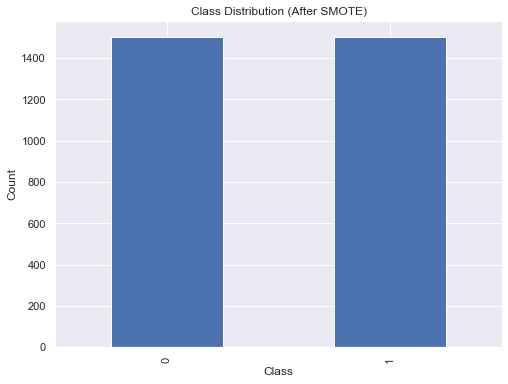

In [ ]:
# Count the occurrences of each class
class_counts = Y_resampled['y_resampled'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (After SMOTE)')
plt.show()

In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
# Add a constant (intercept) to the features
X_with_const = add_constant(X_train)


In [ ]:

# Create and fit the logistic regression model using Ridge (L2) regularization
ridge_model = sm.Logit(y_train, X_with_const)  # Create the model
ridge_results = ridge_model.fit_regularized(method='l1', alpha=1.0)  # Fit with Ridge (L2) regularization

# Print the summary of the logistic regression model with Ridge regularization
print(ridge_results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4793514700078308
            Iterations: 145
            Function evaluations: 148
            Gradient evaluations: 145
                           Logit Regression Results                           
Dep. Variable:       convictd_encoded   No. Observations:                 2107
Model:                          Logit   Df Residuals:                     2094
Method:                           MLE   Df Model:                           12
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                  0.3234
Time:                        12:50:08   Log-Likelihood:                -988.02
converged:                       True   LL-Null:                       -1460.4
Covariance Type:            nonrobust   LLR p-value:                1.431e-194
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
# Export the logistic regression results to an Excel file
summary_table =ridge_results.summary()
summary_table = summary_table.tables[1]  # Select the table containing coefficients and statistics

In [ ]:
# Convert the summary table to a pandas DataFrame
summary_df = pd.DataFrame(summary_table.data, columns=summary_table.data[0])

In [ ]:
# Save the summary DataFrame to an Excel file
summary_df.to_excel('C:/Users/Benjamin/Desktop/Interview/NIW/Data/result_dummy.xlsx', index=False)